In [1]:
import cv2
from face_recognition import faceRecognitionPipeline

In [2]:
import matplotlib.pyplot as plt

### Face Recognition Prediction

In [3]:
pred_img, pred_dict = faceRecognitionPipeline('./test_images/getty_test.jpg')

In [4]:
cv2.imshow("Predicted image",pred_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

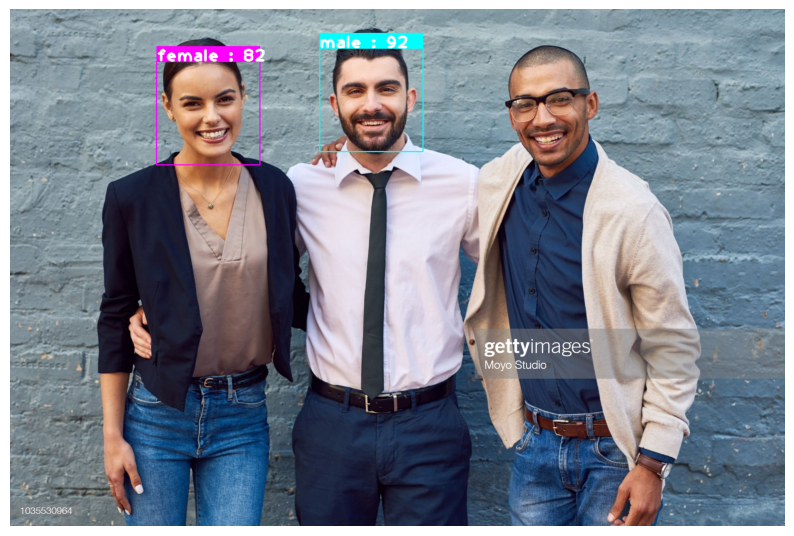

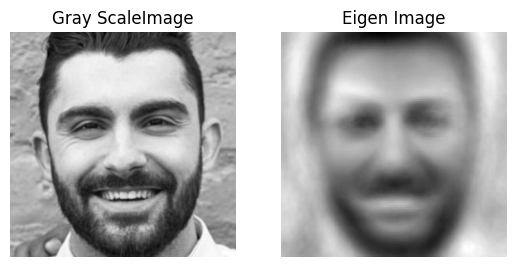

Predicted Gender = male
Predicted score = 92.23 %
----------------------------------------------------------------------------------------------------


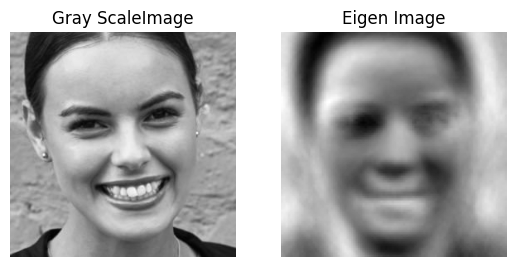

Predicted Gender = female
Predicted score = 82.06 %
----------------------------------------------------------------------------------------------------


In [5]:
img_rgb = cv2.cvtColor(pred_img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

## generate report
for i in range(len(pred_dict)):
    obj_gray = pred_dict[i]['roi'] #gray scale
    obj_eig = pred_dict[i]['eig_img'].reshape(100,100) #eigen image
    plt.subplot(1,2,1)
    plt.imshow(obj_gray,cmap='gray')
    plt.title('Gray ScaleImage')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(obj_eig,cmap='gray')
    plt.title('Eigen Image')
    plt.axis('off')
    
    plt.show()
    print('Predicted Gender =',pred_dict[i]['prediction_name'])
    print('Predicted score = {:,.2f} %'.format(pred_dict[i]['score']*100))
    
    print('-'*100)

### Real Time Gender Recognition

In [6]:
cap = cv2.VideoCapture('./test_images/video.mp4') # 0 -> access webcamera, 1-> external camera, path

while True:
    ret, frame = cap.read()
    
    if ret == False:
        break
    
    pred_img, pred_dict = faceRecognitionPipeline(frame,path=False)
    
    cv2.imshow('prediction',pred_img)
    if cv2.waitKey(1) == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()